<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/nyu-deep-learning-2020/02_space_stretching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Space Stretching

**Reference**:

[Problem Motivation, Linear Algebra, and Visualization](https://atcold.github.io/pytorch-Deep-Learning/en/week01/01-3/)

In [ ]:
!git clone https://github.com/Atcold/pytorch-Deep-Learning
!cp -r pytorch-Deep-Learning/res .
!rm -rf pytorch-Deep-Learning

In [2]:
# Load libraries
import torch
import torch.nn as nn
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [3]:
# Set style (needs to be in a new cell)
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

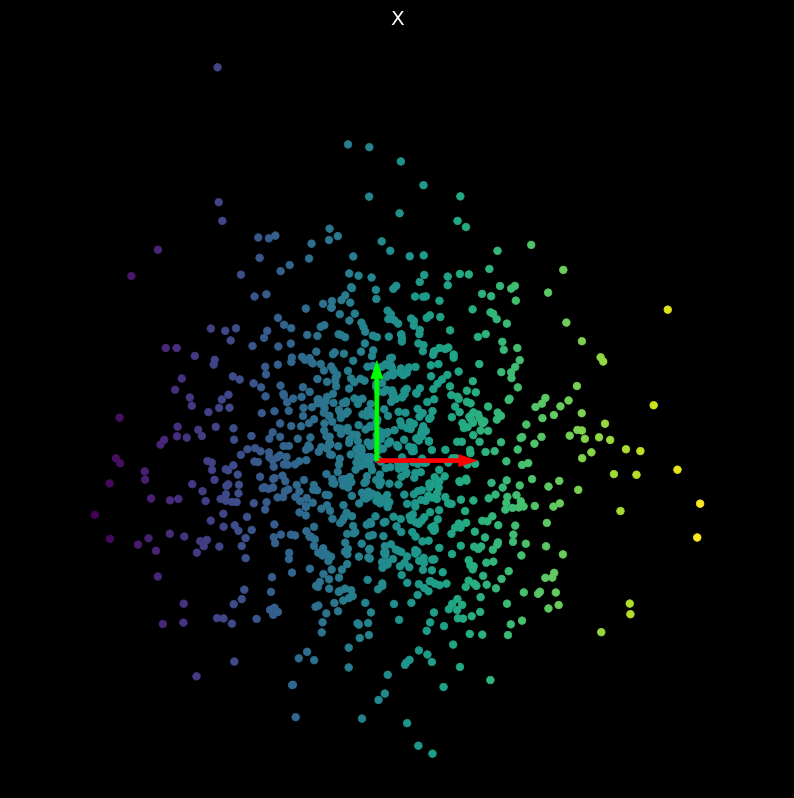

In [5]:
# generate some points in 2-D space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)
plot_bases(OI)

## Linear Transformations

A linear transformation can be represented as a matrix. Using singular value decomposition, we can decompose this matrix into three component matrices, each representing a different linear transformation.

Let's generate a random matrix $W$

$
\begin{equation}
    W = U
  \left[ {\begin{array}{cc}
   s_1 & 0 \\
   0 & s_2 \\
  \end{array} } \right]
  V^\top
\end{equation}
$
* Compute $y = Wx$
* Larger singular values stretch the points
* Smaller singular values push them together
* $U, V$ rotate/reflect

Let's do it with **Numpy**.

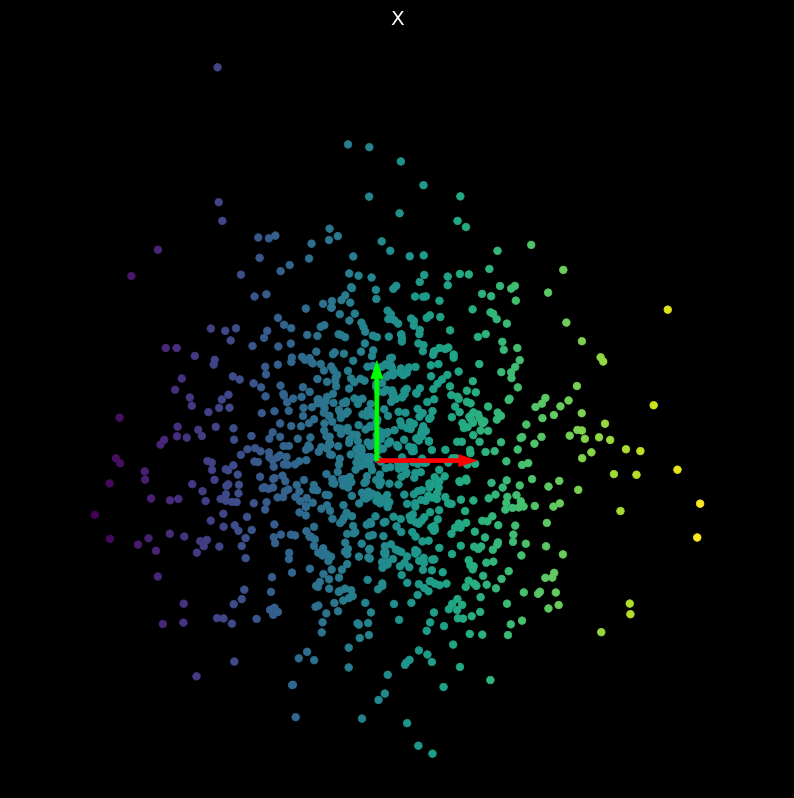

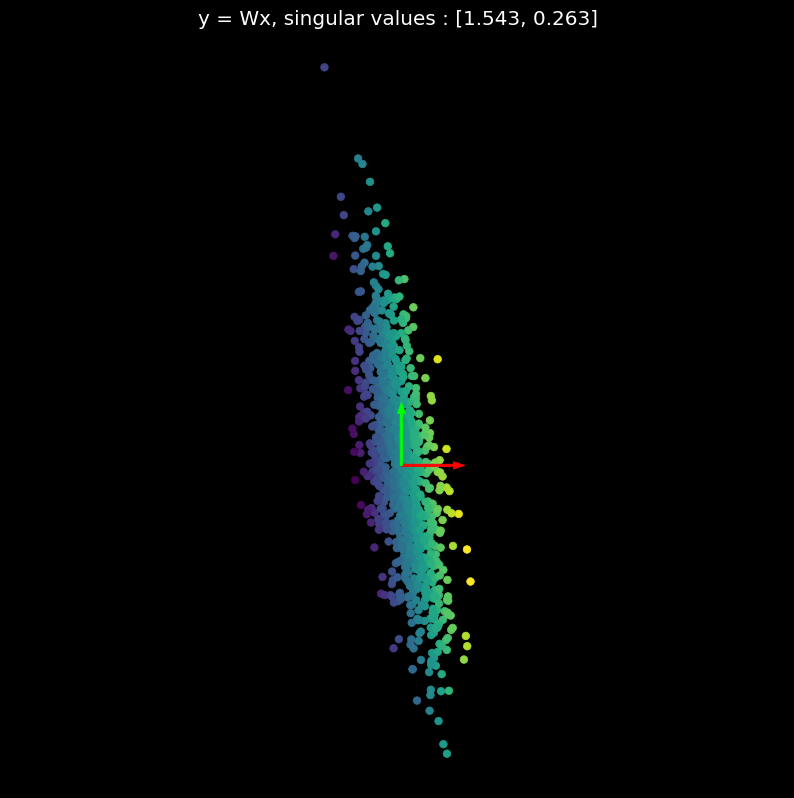

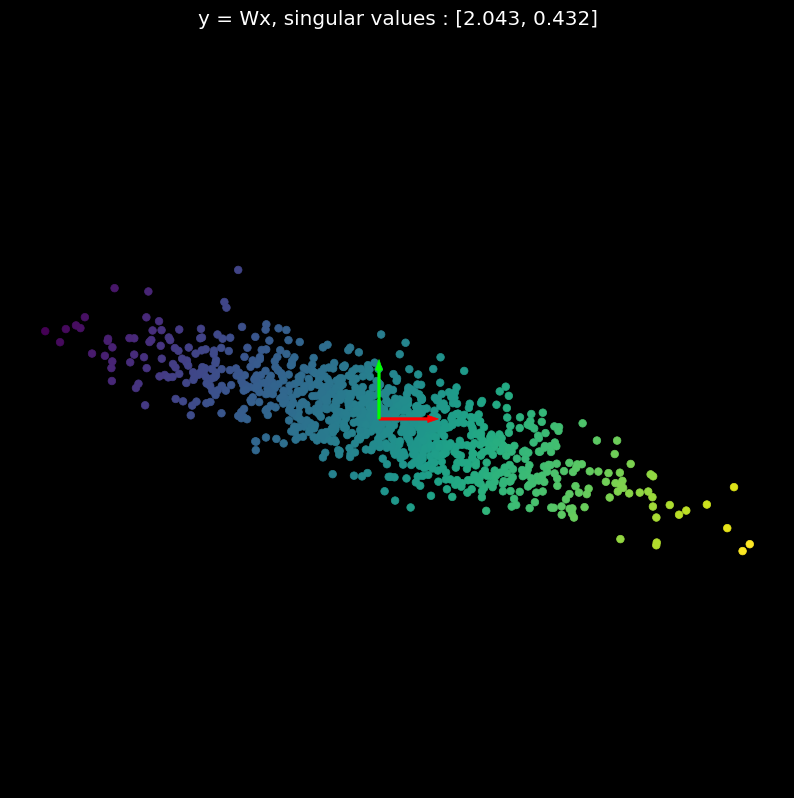

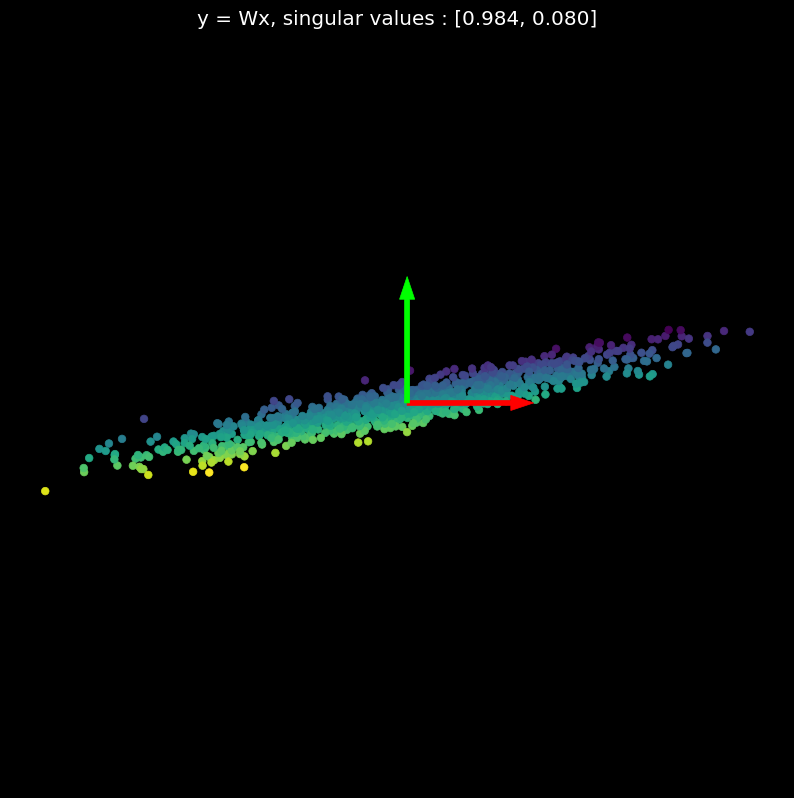

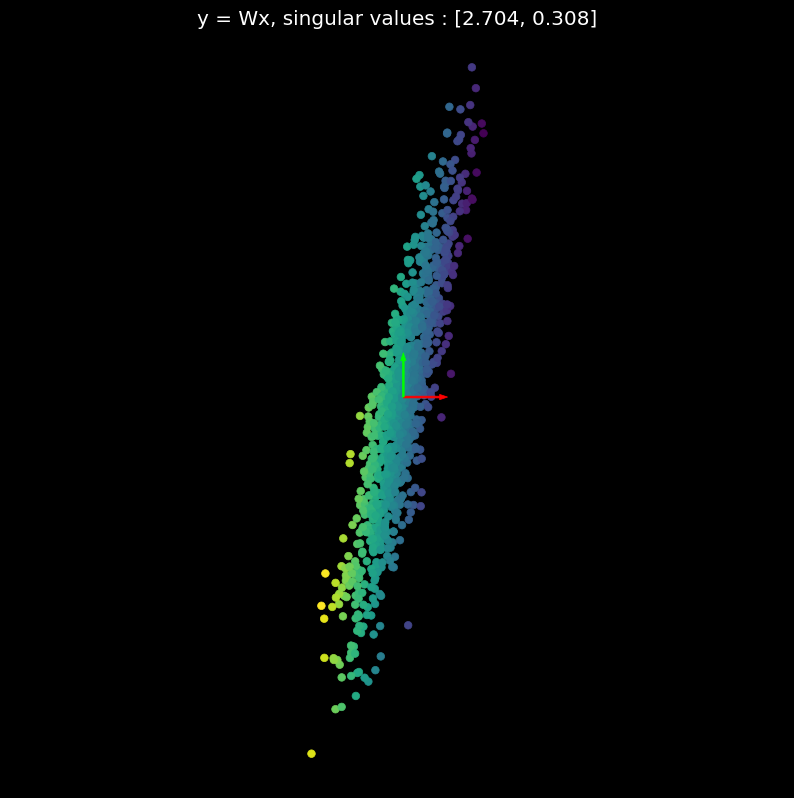

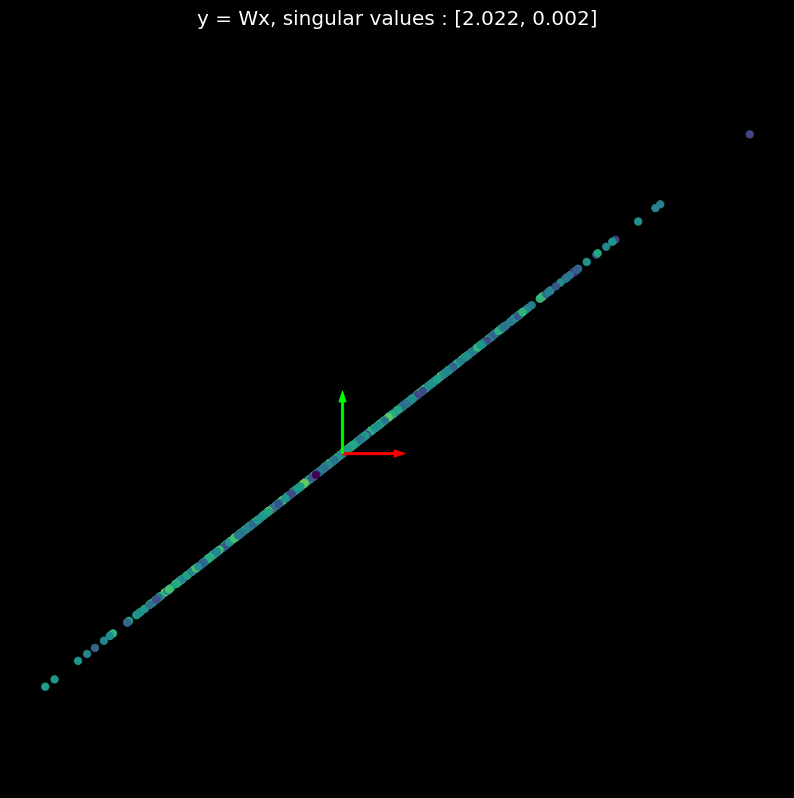

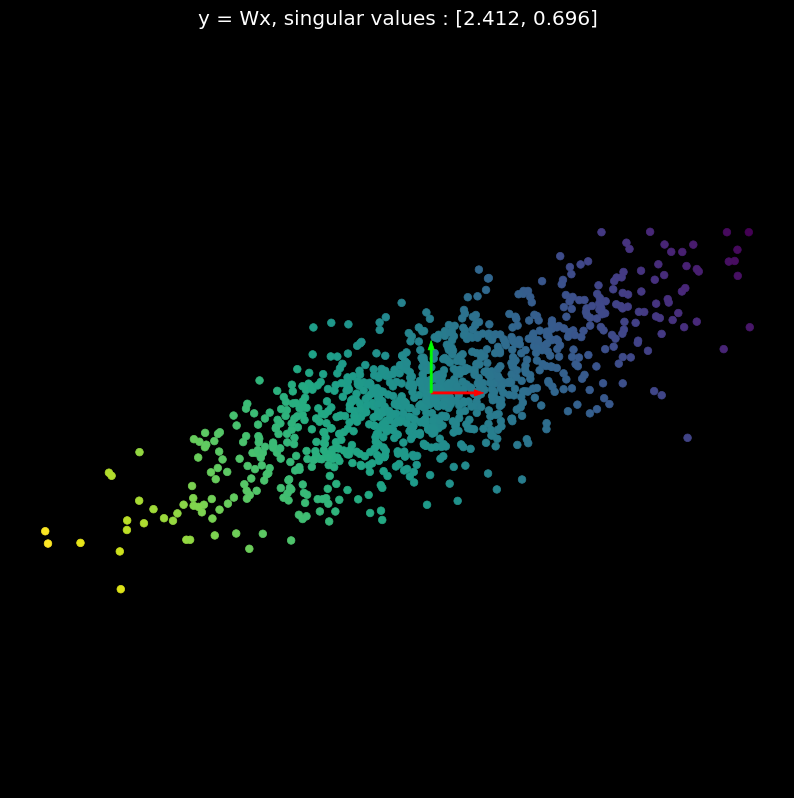

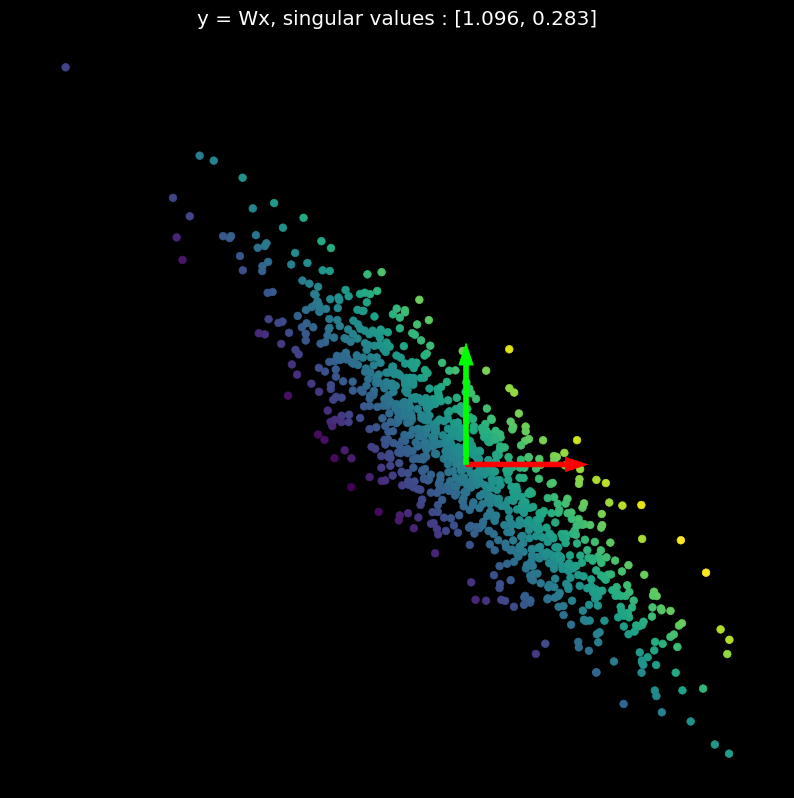

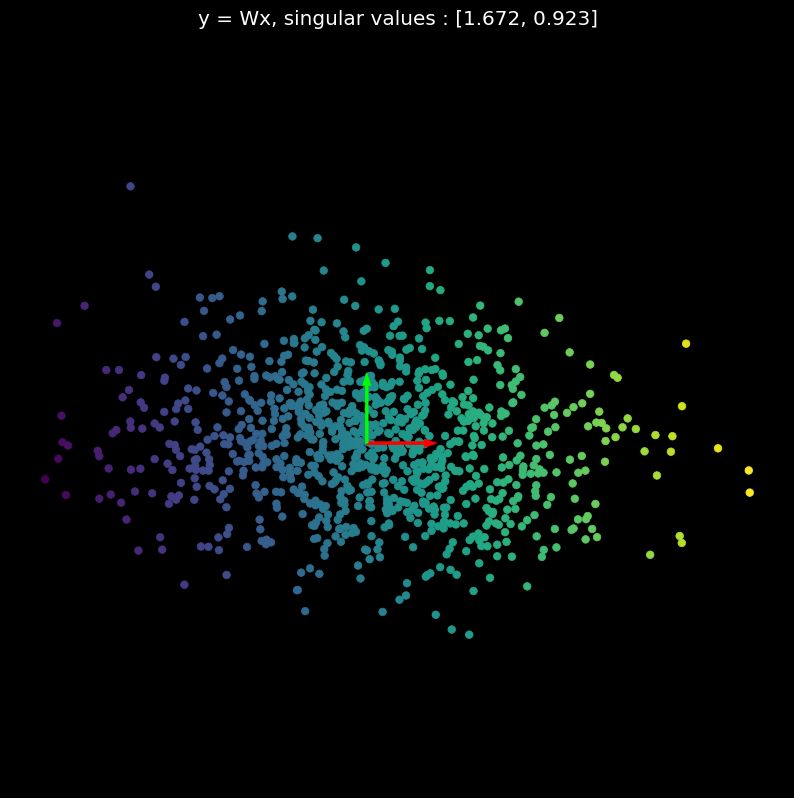

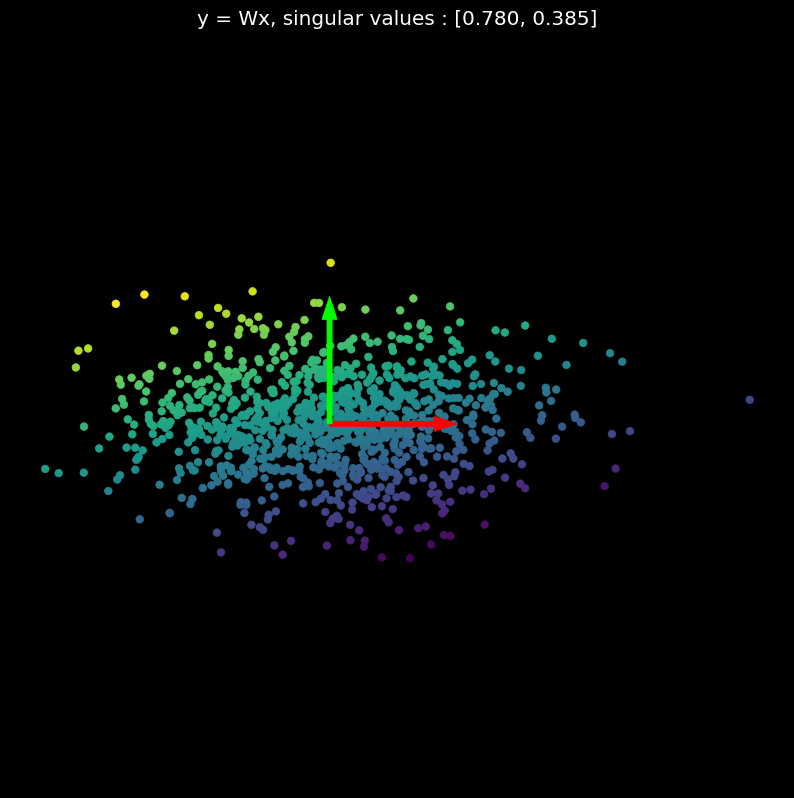

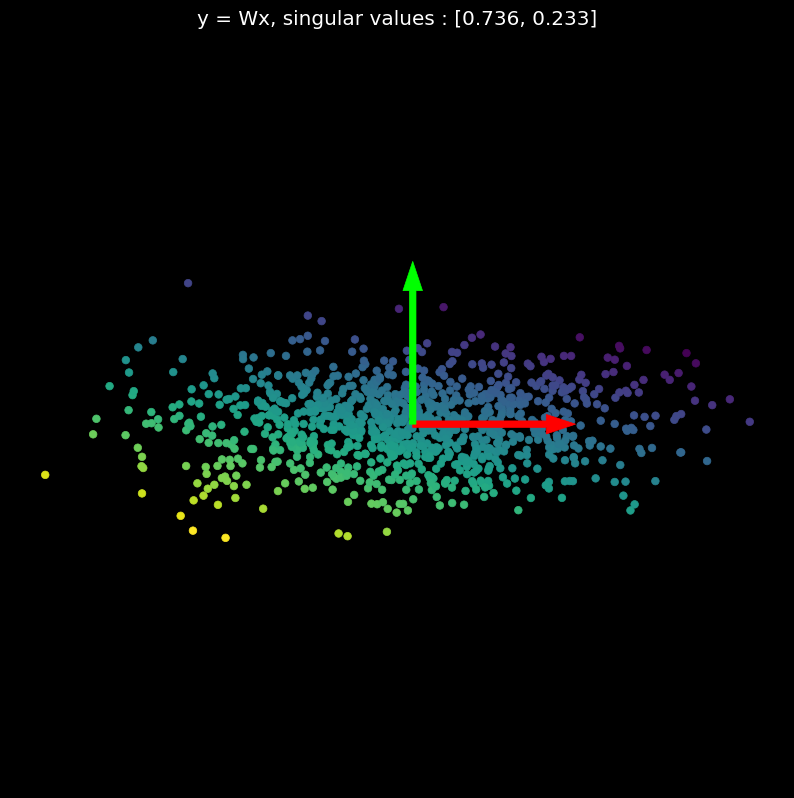

In [6]:
show_scatterplot(X, colors, title="X")
plot_bases(OI)

for i in range(10):
  # create a random matrix
  W = torch.randn(2, 2).to(device)
  # transform points
  Y = X @ W.t()
  # compute singular values
  U, S, V = torch.svd(W)
  # plot transformed points
  show_scatterplot(Y, colors, title=f"y = Wx, singular values : [{S[0]:.3f}, {S[1]:.3f}]")
  # transform the basis
  new_OI = OI @ W.t()
  # plot old and new basis
  plot_bases(OI)
  #plot_bases(new_OI)

We can visualize the linear transformations of several random matrices. Note the effect of the singular values on the resulting transformations.

Now, let's do it with **PyTorch**.

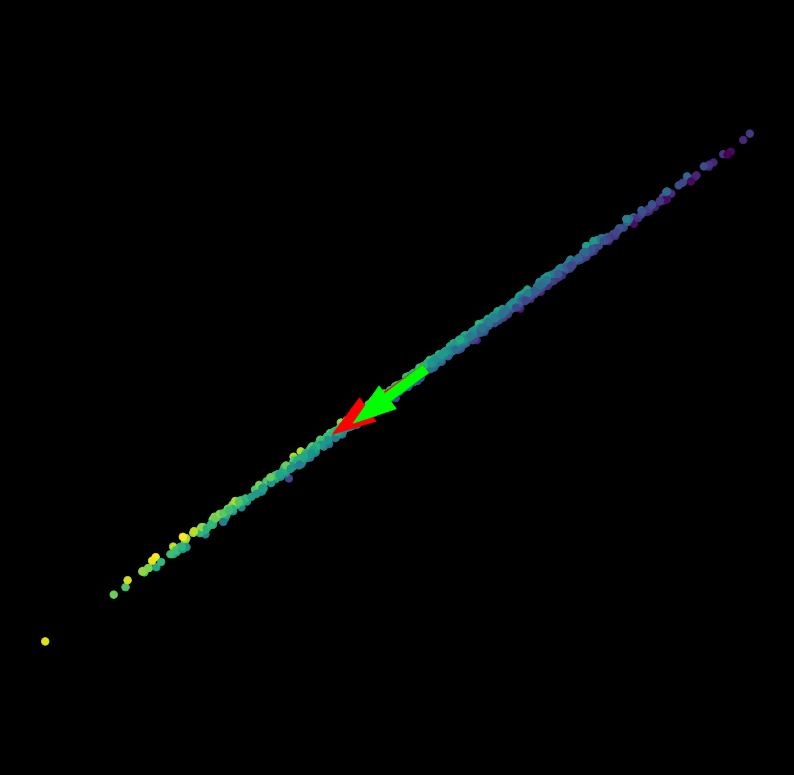

In [7]:
model = nn.Sequential(nn.Linear(2, 2, bias=False))
model.to(device)

with torch.no_grad():
  Y = model(X)
  show_scatterplot(Y, colors)
  plot_bases(model(OI))

##Non-linear transformations

* Linear transforms can rotate, reflect, stretch and compress, but cannot curve
* We need non-linearities for this
* Can (approximately) map points to a square by first stretching out by a factor $s$, then squashing with a tanh function

$
   f(x)= \tanh \left(
  \left[ {\begin{array}{cc}
   s & 0 \\
   0 & s \\
  \end{array} } \right]  
  x
  \right)
$

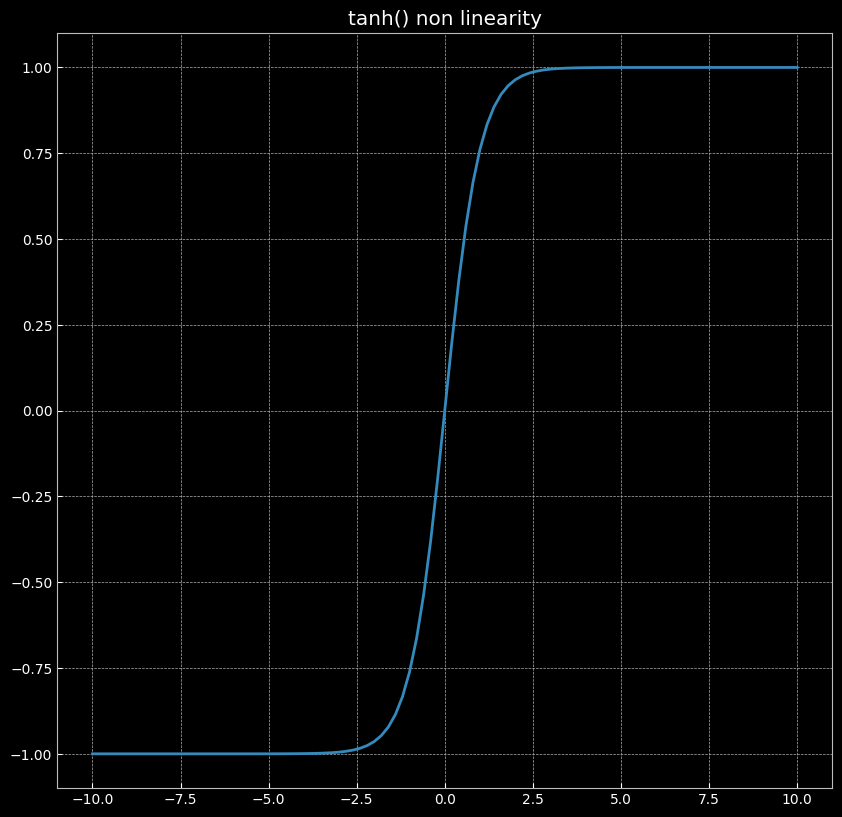

In [8]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)

plot(z.numpy(), s.numpy())
title("tanh() non linearity");

By forcing more points to the edge, we spread them out more and can then attempt to classify them.

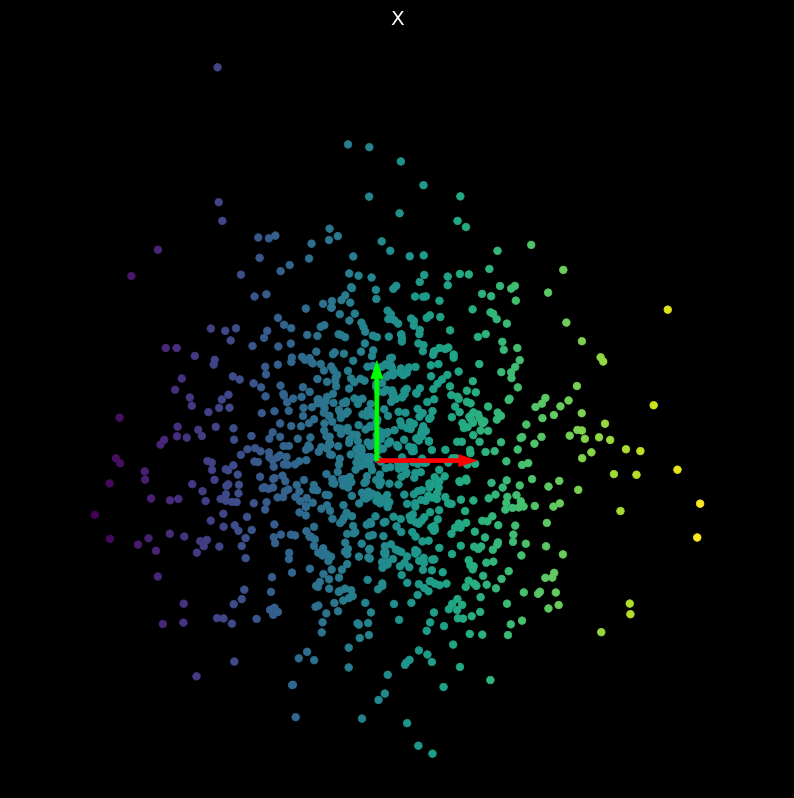

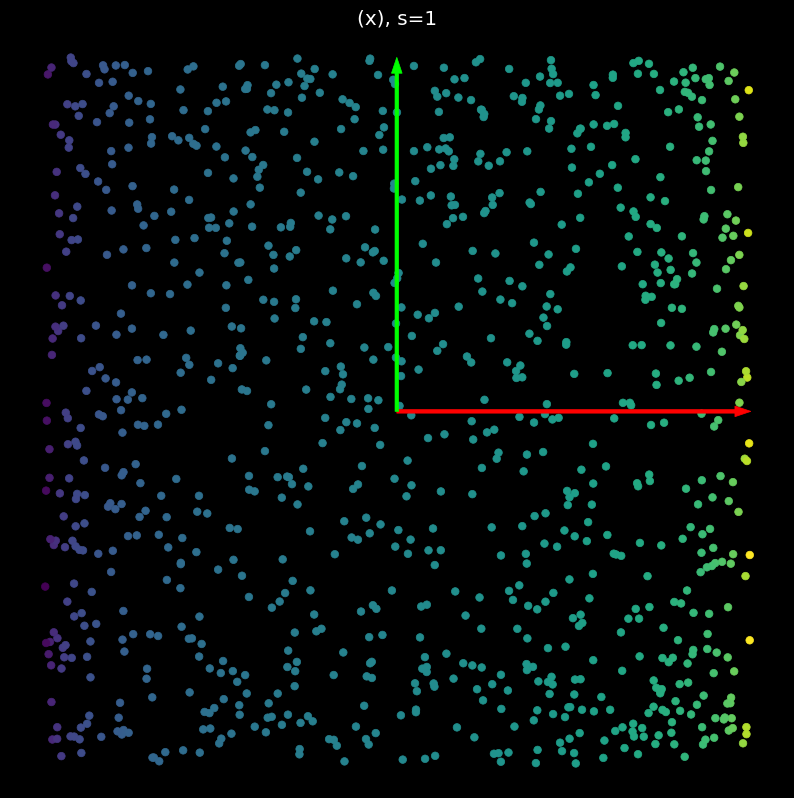

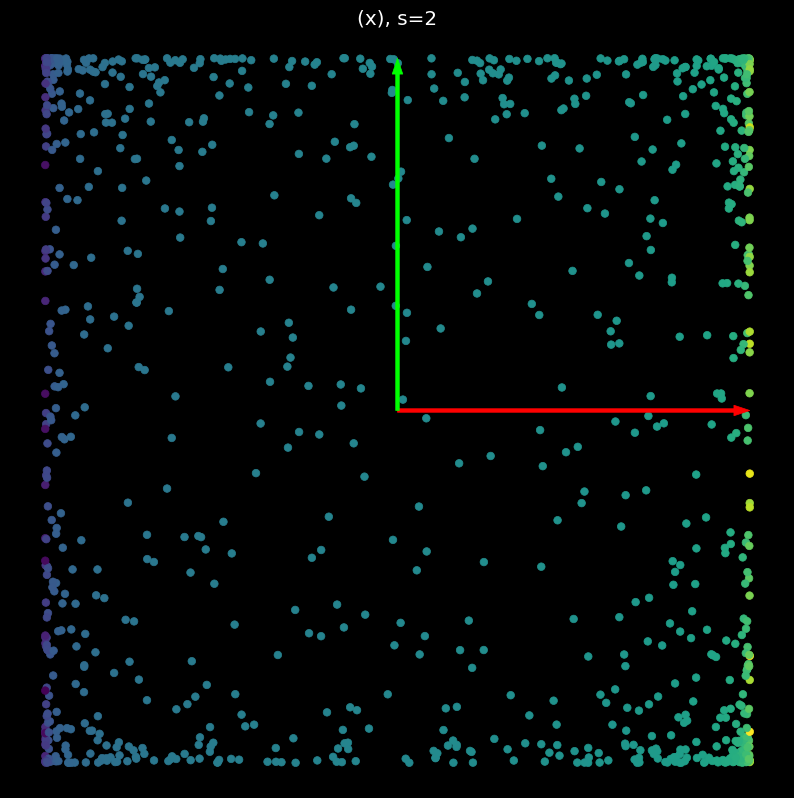

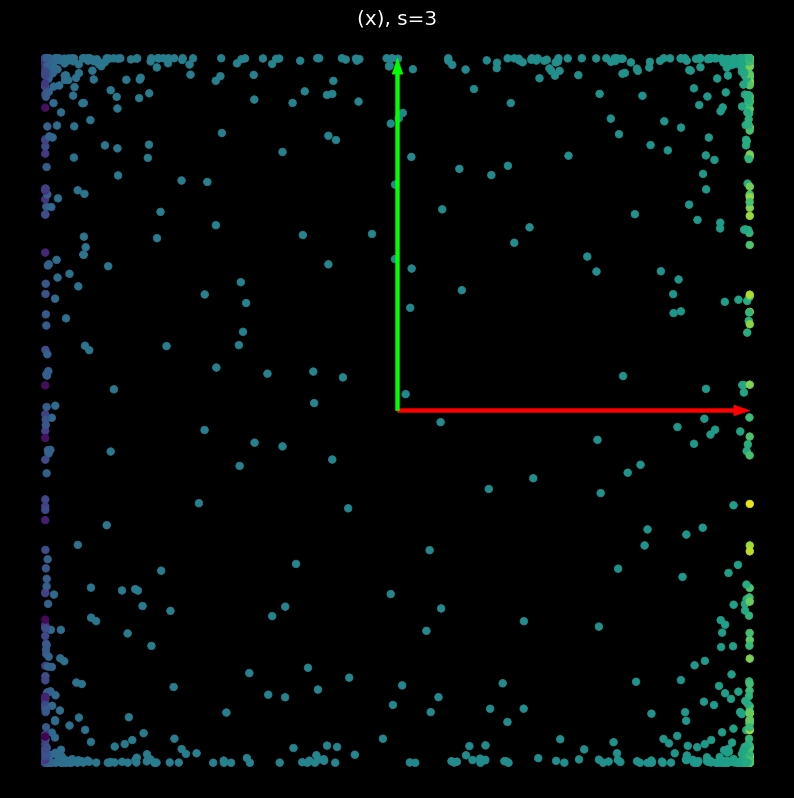

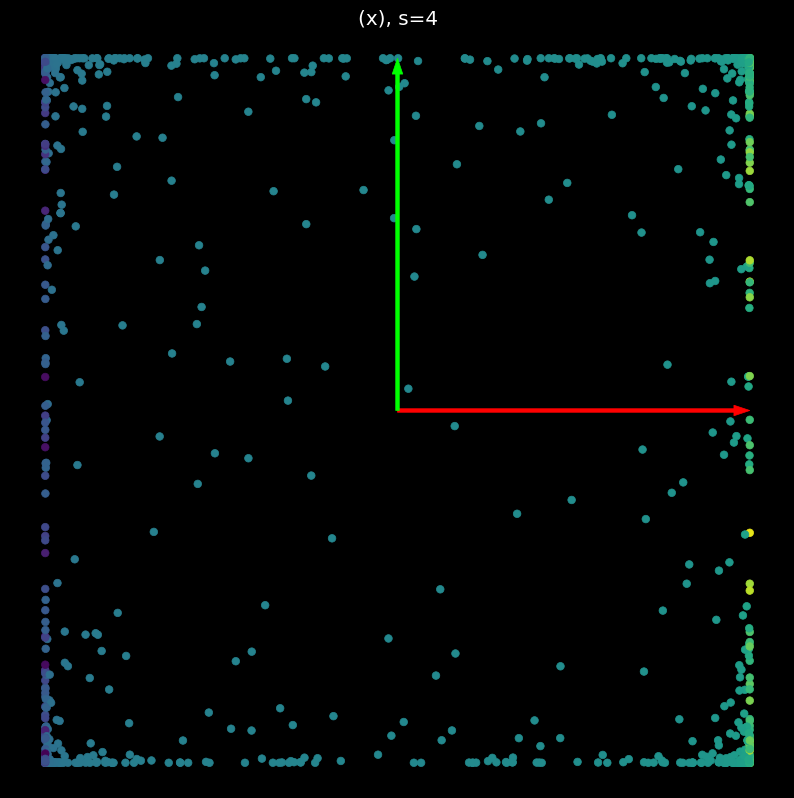

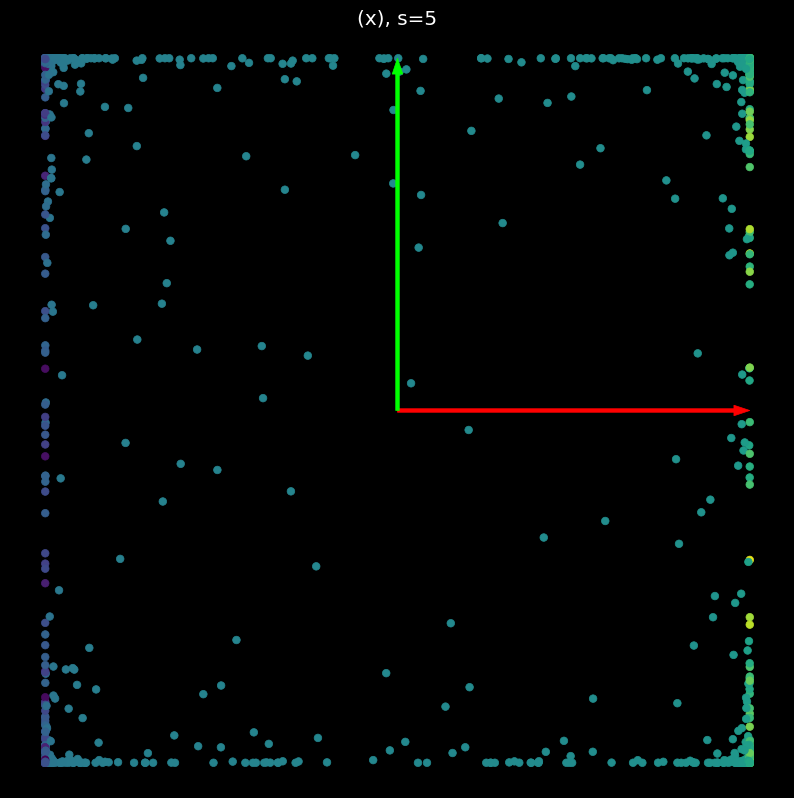

In [10]:
show_scatterplot(X, colors, title="X")
plot_bases(OI)

model = nn.Sequential(
  nn.Linear(2, 2, bias=False),
  nn.Tanh()
)
model.to(device)

for s in range(1, 6):
  W = s * torch.eye(2)
  model[0].weight.data.copy_(W)
  Y = model(X).data
  show_scatterplot(Y, colors, title=f"(x), s={s}")
  plot_bases(OI, width=0.01)

##Neural Networks Transformation 

Lastly, we visualize the transformation performed by a simple, untrained neural network.

Going forward, we will see how to make these transformations performed by neural networks useful for our end goal of classification.

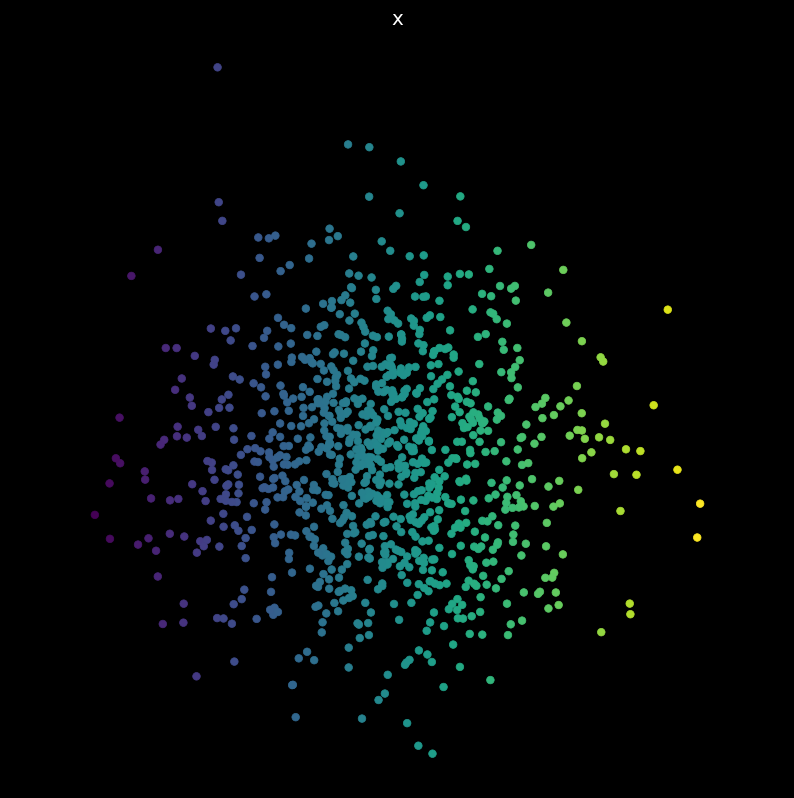

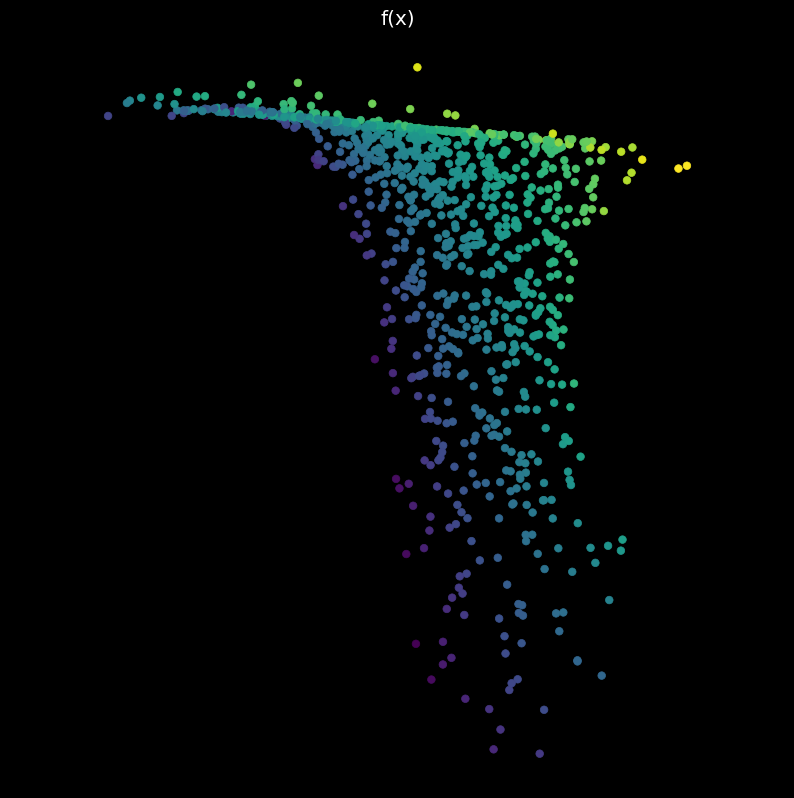

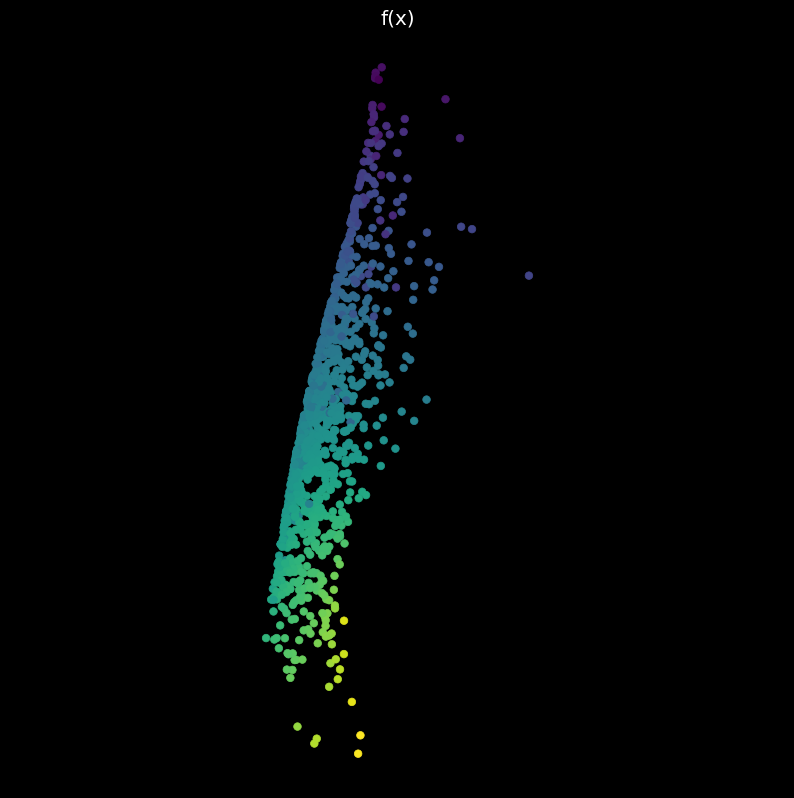

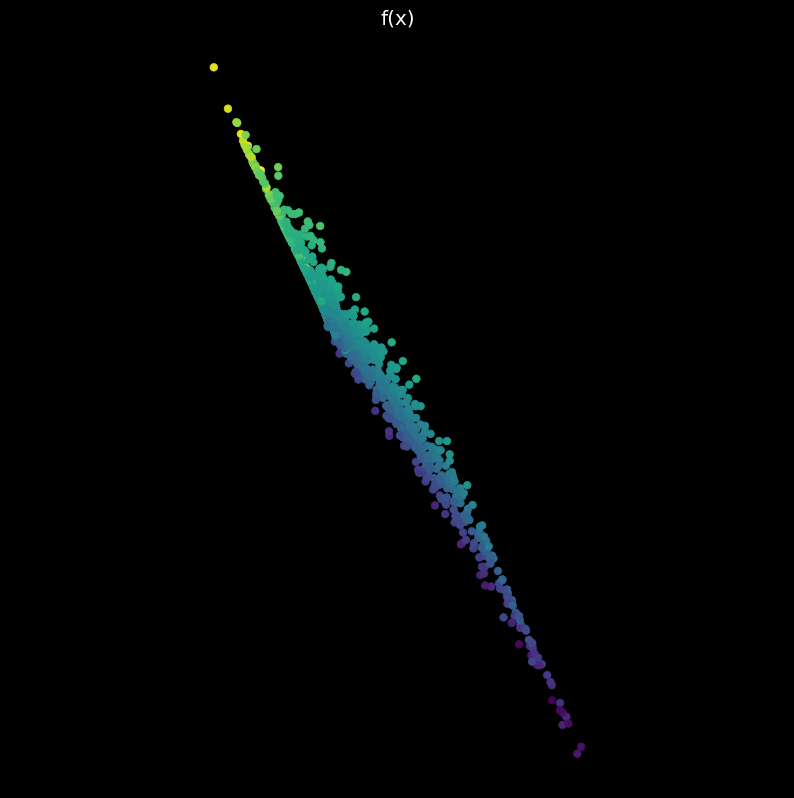

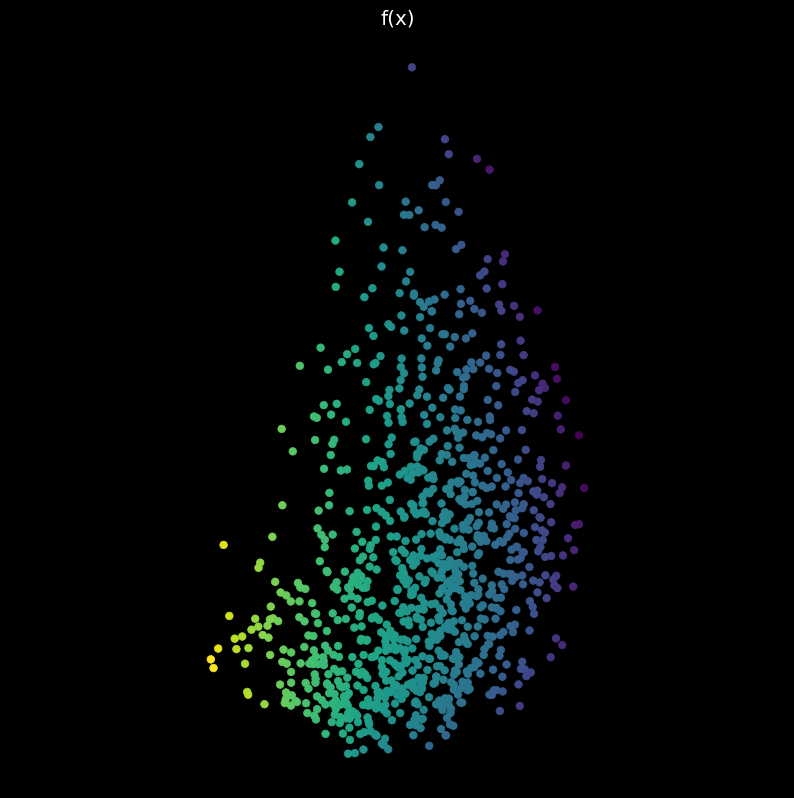

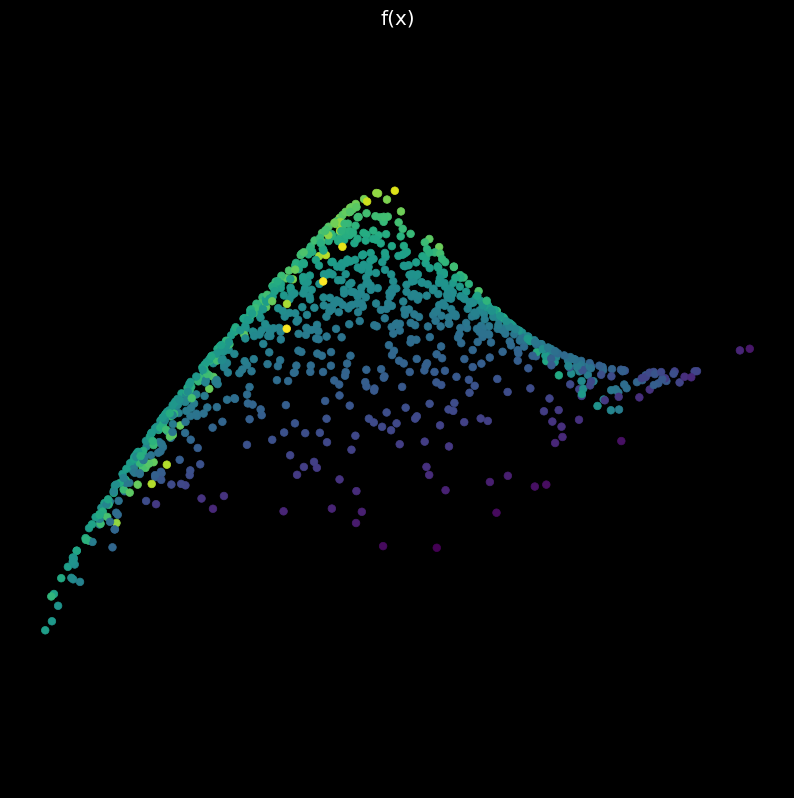

In [12]:
show_scatterplot(X, colors, title="x")
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
  # create 1-layer neural networks with random weights
  model = nn.Sequential(
    nn.Linear(2, n_hidden),
    NL,
    nn.Linear(n_hidden, 2)
  )
  model.to(device)

  with torch.no_grad():
    Y = model(X)
  show_scatterplot(Y, colors, title="f(x)")
  #plot_bases(OI)

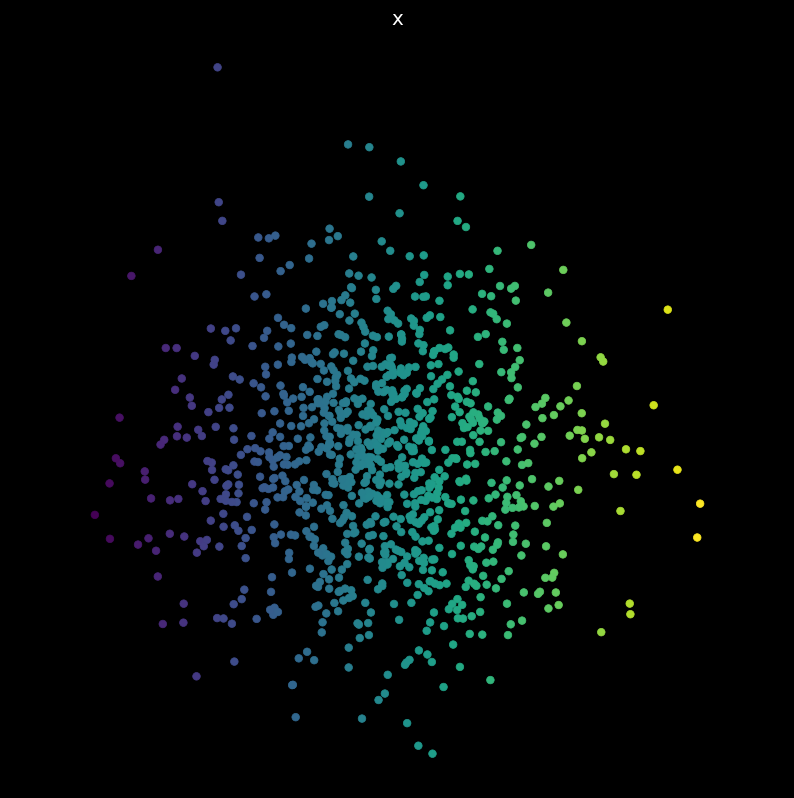

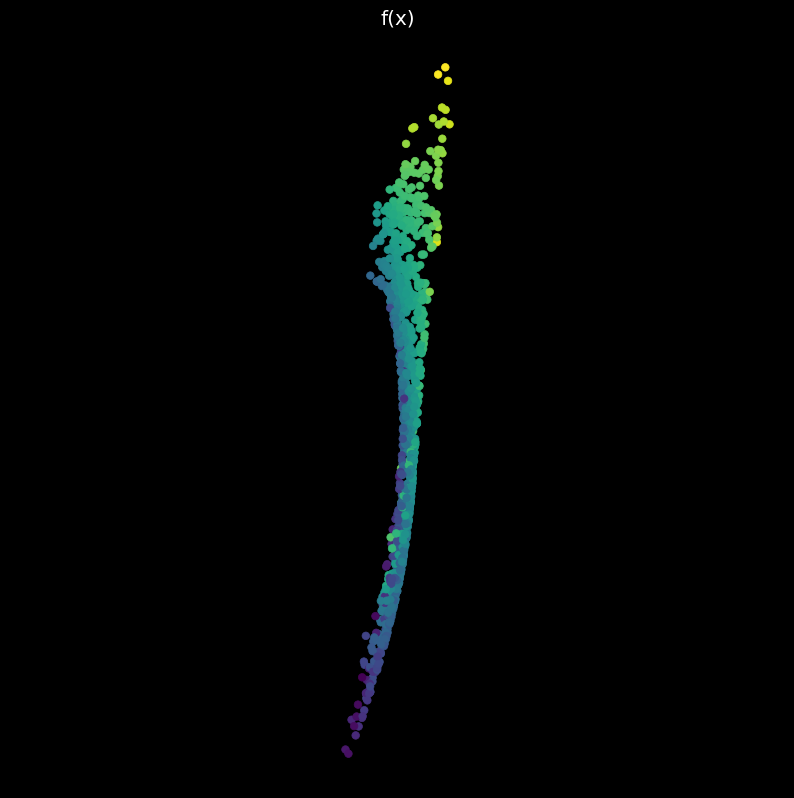

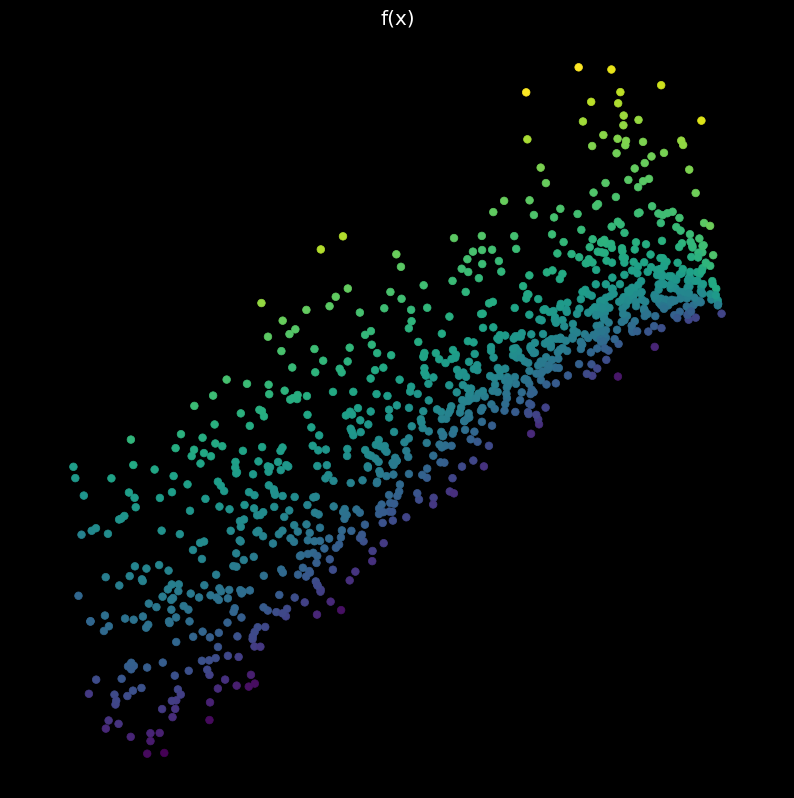

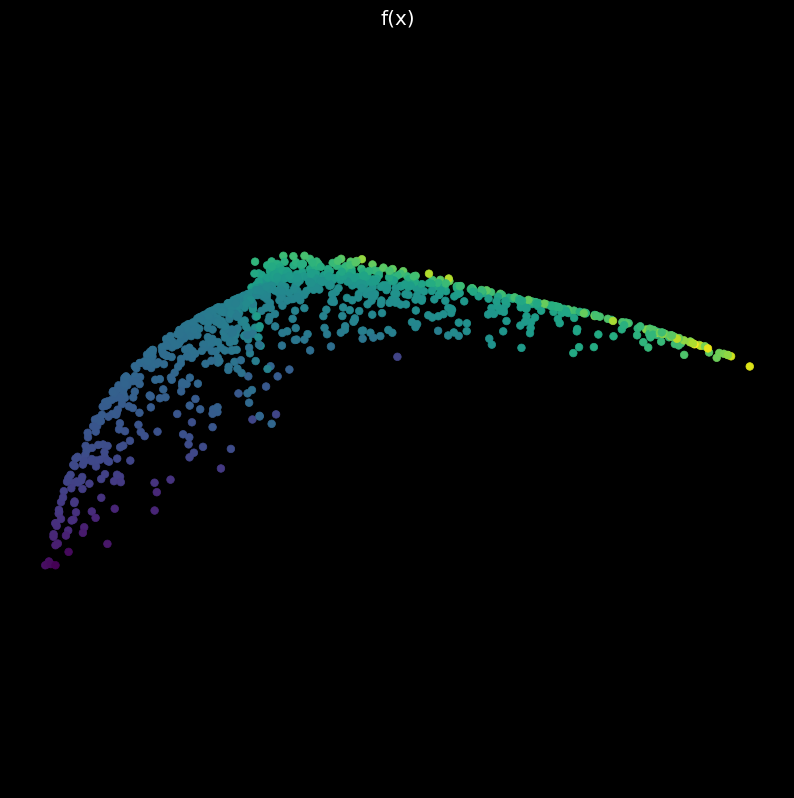

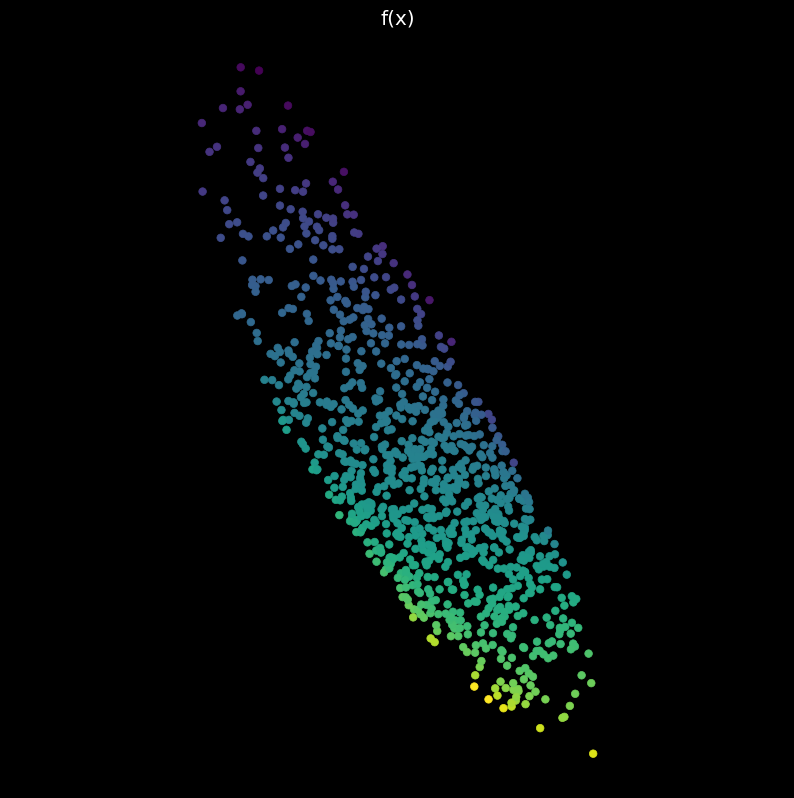

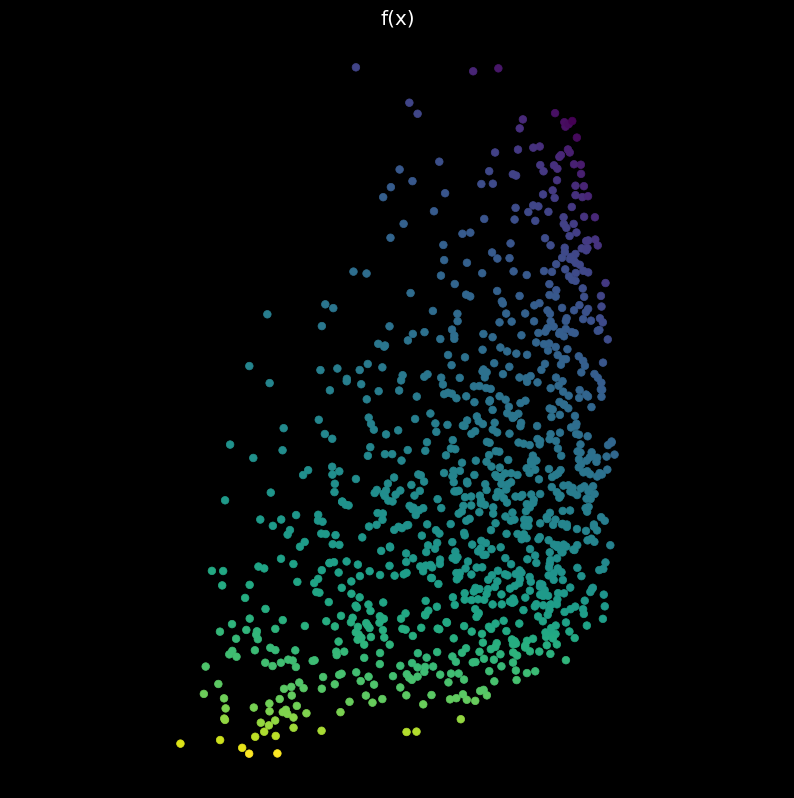

In [13]:
show_scatterplot(X, colors, title="x")
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
  # create 4-layer neural networks with random weights
  model = nn.Sequential(
    nn.Linear(2, n_hidden),
    NL,
    nn.Linear(n_hidden, n_hidden),
    NL,
    nn.Linear(n_hidden, n_hidden),
    NL,
    nn.Linear(n_hidden, n_hidden),
    NL,
    nn.Linear(n_hidden, 2),
  )
  model.to(device)

  with torch.no_grad():
    Y = model(X).detach()
  show_scatterplot(Y, colors, title="f(x)")